In [1]:
import cv2
import PIL
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras
import random
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adadelta, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Conv2D, Conv2DTranspose, Flatten

In [2]:
# the data, shuffled and split between train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


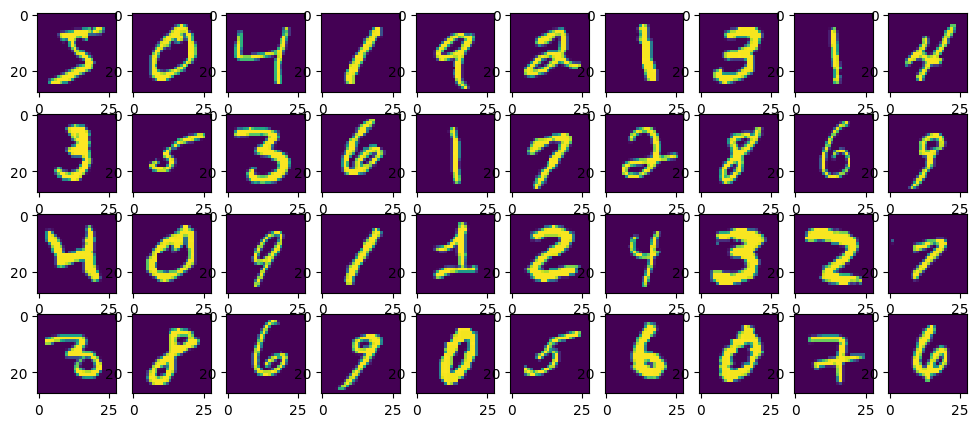

In [3]:
plt.figure(figsize=(12,5))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()



In [4]:
def crop(img):
    y=5
    x=4
    h=23
    w=26
    im = img.reshape((28,28))
    crop_image = im[x:w, y:h]
    return crop_image


In [5]:
non_zerox = []
non_zeroy = []

for i in range(len(x_train)):
    if y_train[i][0] == 1:
        pass
    else:
        non_zerox.append(x_train[i])
        non_zeroy.append(y_train[i])

In [6]:
new_x = []
new_y = []
for i in range(60000):
    c1 = random.randint(0, len(non_zerox) - 1)
    l1 = np.argmax(non_zeroy[c1])

    c2 = random.randint(0, len(x_train) - 1)
    l2 = np.argmax(y_train[c2])

    c3 = random.randint(0, len(x_train) - 1)
    l3 = np.argmax(y_train[c3])

    c4 = random.randint(0, len(x_train) - 1)
    l4 = np.argmax(y_train[c4])

    c5 = random.randint(0, len(x_train) - 1)
    l5 = np.argmax(y_train[c5])

    combined_image = np.hstack((crop(non_zerox[c1]), crop(x_train[c2]),crop(x_train[c3]),crop(x_train[c4]),crop(x_train[c5])))
#     label = int("{0}{1}{2}{3}{4}".format(l1,l2,l3,l4,l5))
    label =[l1,l2,l3,l4,l5]
    new_x.append(combined_image)
    new_y.append(label)

In [7]:
non_zerotestx = []
non_zerotesty = []

for i in range(len(x_test)):
    if y_test[i][0] == 1:
        pass
    else:
        non_zerotestx.append(x_test[i])
        non_zerotesty.append(y_test[i])

In [8]:
test_x = []
test_y = []
for i in range(10000):
    c1 = random.randint(0, len(non_zerotestx) - 1)
    l1 = np.argmax(non_zerotesty[c1])

    c2 = random.randint(0, len(x_test) - 1)
    l2 = np.argmax(y_test[c2])

    c3 = random.randint(0, len(x_test) - 1)
    l3 = np.argmax(y_test[c3])

    c4 = random.randint(0, len(x_test) - 1)
    l4 = np.argmax(y_test[c4])

    c5 = random.randint(0, len(x_test) - 1)
    l5 = np.argmax(y_test[c5])

    combined_image = np.hstack((crop(non_zerotestx[c1]), crop(x_test[c2]),crop(x_test[c3]),crop(x_test[c4]),crop(x_test[c5])))
    label =[l1,l2,l3,l4,l5]

    test_x.append(combined_image)
    test_y.append(label)

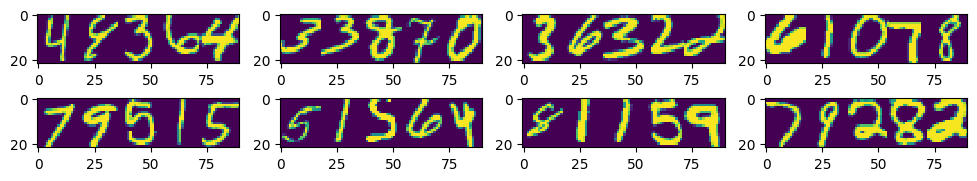

In [9]:
plt.figure(figsize=(12,2))
x, y = 4, 2
for i in range(8):
    plt.subplot(y, x, i+1)
    plt.imshow(new_x[i],interpolation='nearest')
plt.show()

In [10]:
train_x = np.array(new_x)
train_y = np.array(new_y)

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(train_x, train_y, test_size=0.15, random_state=42)

Y_train =Y_train/255
Y_valid= Y_valid/255

X_test = np.array(test_x)
Y_test = np.array(test_y)

Y_test = Y_test/255

In [11]:
model = Sequential()
# Convolutional layers
model.add(Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=(22, 90, 1),kernel_regularizer=regularizers.L2(0.0001)))
model.add(LeakyReLU(0.2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (5,5), strides=(2,2), padding='same',kernel_regularizer=regularizers.L2(0.0001)))
model.add(LeakyReLU(0.2))
model.add(Dropout(0.25))
# Flatten the output and add a dense layer
model.add(Flatten())
model.add(Dense(5, activation='sigmoid',bias_regularizer=regularizers.L2(1e-4)))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
          optimizer=keras.optimizers.Adam(0.0002, 0.5),
          metrics=['accuracy'])

history =model.fit(X_train, Y_train,
      batch_size=100,
      epochs=300,
      verbose=1,shuffle=True,
      validation_data=(X_valid,Y_valid))

Epoch 1/300
510/510 [==============================] - 11s 10ms/step - loss: 0.1036 - accuracy: 0.3645 - val_loss: 0.0929 - val_accuracy: 0.4874
Epoch 2/300
510/510 [==============================] - 5s 10ms/step - loss: 0.0915 - accuracy: 0.4793 - val_loss: 0.0900 - val_accuracy: 0.5222
Epoch 3/300
510/510 [==============================] - 5s 10ms/step - loss: 0.0895 - accuracy: 0.5199 - val_loss: 0.0889 - val_accuracy: 0.5586
Epoch 4/300
510/510 [==============================] - 5s 10ms/step - loss: 0.0885 - accuracy: 0.5501 - val_loss: 0.0879 - val_accuracy: 0.5821
Epoch 5/300
510/510 [==============================] - 5s 10ms/step - loss: 0.0880 - accuracy: 0.5703 - val_loss: 0.0876 - val_accuracy: 0.6127
Epoch 6/300
510/510 [==============================] - 5s 10ms/step - loss: 0.0877 - accuracy: 0.5894 - val_loss: 0.0872 - val_accuracy: 0.6258
Epoch 7/300
510/510 [==============================] - 5s 10ms/step - loss: 0.0875 - accuracy: 0.6011 - val_loss: 0.0871 - val_accuracy

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 45, 64)        1664      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 11, 45, 64)        0         
                                                                 
 dropout (Dropout)           (None, 11, 45, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 23, 128)        204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6, 23, 128)        0         
                                                                 
 dropout_1 (Dropout)         (None, 6, 23, 128)        0         
                                                                 
 flatten (Flatten)           (None, 17664)             0

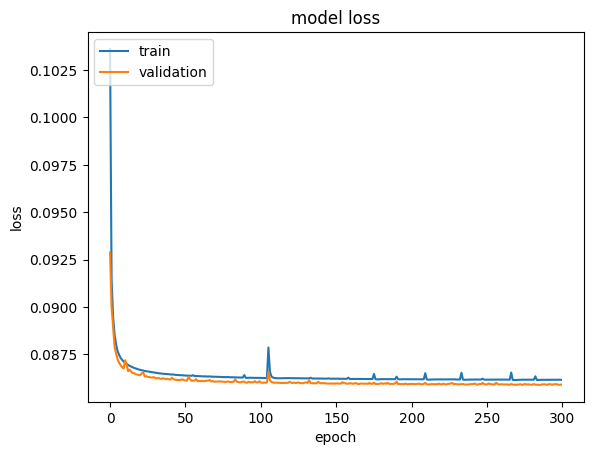

In [13]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

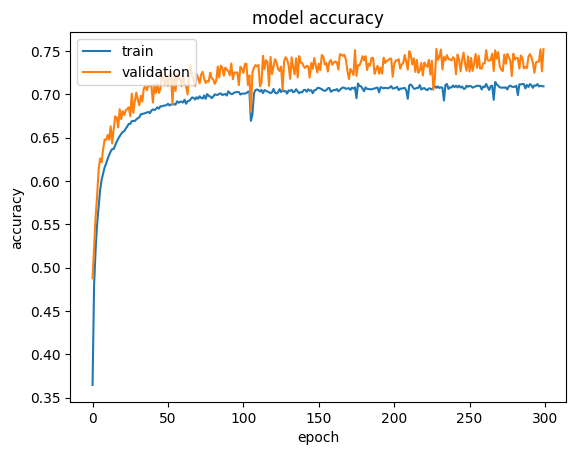

In [14]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
yhat = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
loss, metrics = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.7614


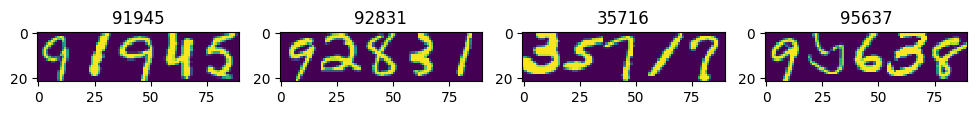

In [31]:
plt.figure(figsize=(12,2))
x, y = 4, 1
index=[1,3,11,20]
for i in range(4):
    plt.subplot(y, x, i+1)
    plt.imshow(test_x[index[i]],interpolation='nearest')
    label = []
    for j in yhat[index[i]]:
      label.append(round(j*255))
    title = '{0}{1}{2}{3}{4}'.format(label[0],label[1],label[2],label[3],label[4])
    plt.title(title)
plt.show()